In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycytominer import aggregate, annotate, normalize, feature_select, cyto_utils
from cytominer_eval import evaluate
from cytominer_eval.transform import metric_melt
from sklearn.decomposition import PCA
from pycytominer.cyto_utils import infer_cp_features
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import data_selection as ds
from utils import eval

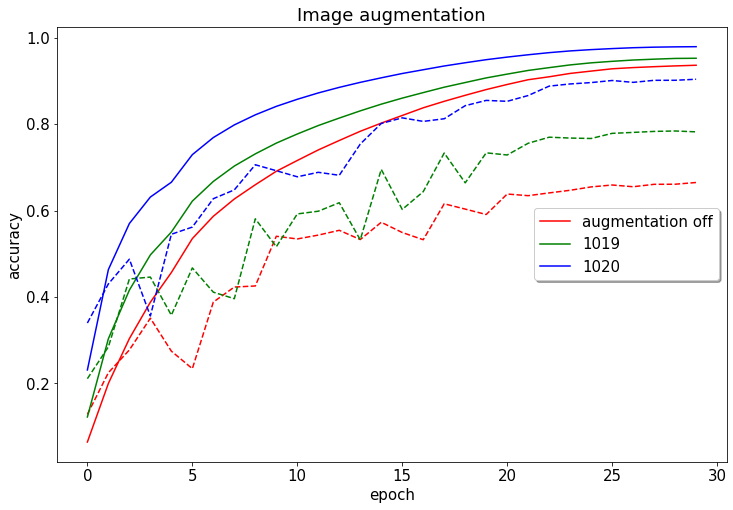

In [5]:
eval.plotting.accuracy_noloss(title="Image augmentation", index1='1008', label_1='augmentation off', index2='1019', label_2='1019', index3='1020', label_3='1020')

In [10]:
pd.read_csv("accuracy/1020.csv").iloc[-1]

loss       0.2875
acc        0.9795
val_acc    0.9041
Name: 29, dtype: float64

In [ ]:
res1020 = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/runs/1020/results.csv')
res1019 = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/runs/1019/results.csv')
res1008 = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/runs/1008/results.csv')

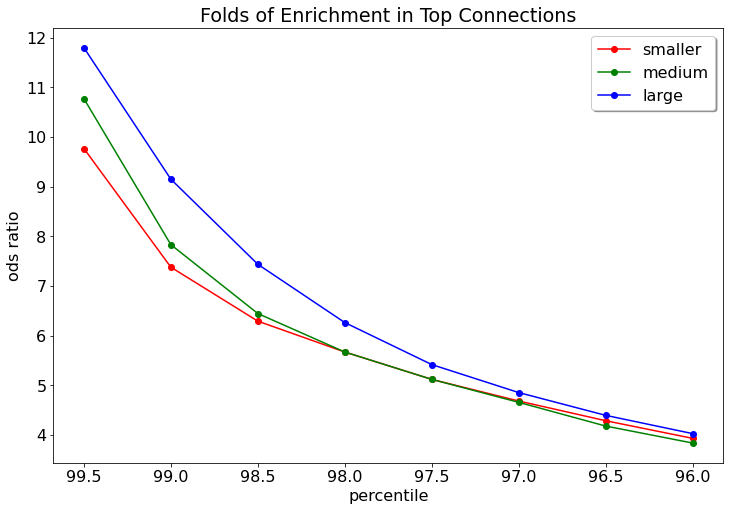

In [6]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*res1008["enrichment_percentile"], res1008["ods_ratio"], marker="o", color="red", label = 'smaller')
plt.plot(100*res1019["enrichment_percentile"], res1019["ods_ratio"], marker="o", color="green", label = 'medium')
plt.plot(100*res1020["enrichment_percentile"], res1020["ods_ratio"], marker="o", color="blue", label = 'large')
# plt.plot(100*df812_out_enr["enrichment_percentile"], df812_out_enr["ods_ratio"], marker="o", color="orange", label = 'out of index')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

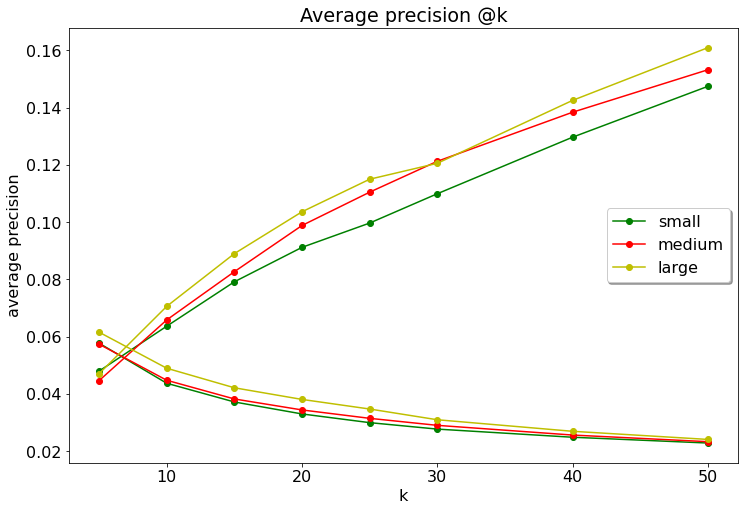

In [8]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(res1008["k"], res1008["precision"], marker="o", color="green", label = 'small')
plt.plot(res1008["k"], res1008["recall"], marker="o", color="g")
plt.plot(res1019["k"], res1019["precision"], marker="o", color="r", label = 'medium')
plt.plot(res1019["k"], res1019["recall"], marker="o", color="red")
plt.plot(res1020["k"], res1020["precision"], marker="o", color="y", label = 'large')
plt.plot(res1020["k"], res1020["recall"], marker="o", color="y")
# plt.plot(base_pre_out["k"], base_pre_out["precision"], marker="o", color="y", label = 'out')
# plt.plot(base_pre_out["k"], base_pre_out["recall"], marker="o", color="y")
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'center right', shadow=True)
plt.show()

In [5]:
res1008



,Unnamed: 0,enrichment_percentile,threshold,ods_ratio,p-value,k,precision,recall
0,0,0.995,0.395813,9.768233,1.655298e-257,5.0,0.057743,0.048009
1,1,0.990,0.301032,7.380190,1.658866e-316,10.0,0.043745,0.063698
2,2,0.985,0.247142,6.294177,0.000000e+00,15.0,0.037212,0.079206
3,3,0.980,0.208980,5.672692,0.000000e+00,20.0,0.033027,0.091240
4,4,0.975,0.180624,5.122120,0.000000e+00,25.0,0.029991,0.099724
5,5,0.970,0.159923,4.686577,0.000000e+00,30.0,0.027734,0.109963
6,6,0.965,0.143557,4.289957,0.000000e+00,40.0,0.024891,0.129714
7,7,0.960,0.130222,3.935171,0.000000e+00,50.0,0.022870,0.147478


In [4]:
res1019


,Unnamed: 0,enrichment_percentile,threshold,ods_ratio,p-value,k,precision,recall
0,0,0.995,0.376773,10.772114,5.553239e-298,5.0,0.057393,0.044694
1,1,0.990,0.282160,7.833442,0.000000e+00,10.0,0.044794,0.065887
2,2,0.985,0.231330,6.447377,0.000000e+00,15.0,0.038262,0.082742
3,3,0.980,0.196941,5.672692,0.000000e+00,20.0,0.034427,0.098878
4,4,0.975,0.172174,5.122120,0.000000e+00,25.0,0.031496,0.110513
5,5,0.970,0.153494,4.659870,0.000000e+00,30.0,0.029046,0.121293
6,6,0.965,0.138562,4.182562,0.000000e+00,40.0,0.025656,0.138437
7,7,0.960,0.126641,3.840730,0.000000e+00,50.0,0.023342,0.153265


In [6]:
res1020


,Unnamed: 0,enrichment_percentile,threshold,ods_ratio,p-value,k,precision,recall
0,0,0.995,0.388628,11.797393,0.0,5.0,0.061592,0.047111
1,1,0.990,0.295821,9.150768,0.0,10.0,0.048994,0.070636
2,2,0.985,0.243938,7.438352,0.0,15.0,0.042170,0.089050
3,3,0.980,0.209412,6.265665,0.0,20.0,0.038101,0.103667
4,4,0.975,0.183767,5.420050,0.0,25.0,0.034751,0.115034
5,5,0.970,0.164174,4.856751,0.0,30.0,0.031000,0.120595
6,6,0.965,0.148787,4.398171,0.0,40.0,0.026969,0.142576
7,7,0.960,0.136488,4.030324,0.0,50.0,0.024129,0.160983
